# Upper Confidence Bound (UCB)

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [12]:
import math

N = 500
d = 10
ads_selected = []
numbers_of_selection = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i  in range(0, d):
    if (numbers_of_selection[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selection[i]
      delta_i = math.sqrt(1.5 * (math.log(n + 1) / numbers_of_selection[i]))
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (max_upper_bound < upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selection[ad] = numbers_of_selection[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

print(total_reward)



60


## Visualising the results

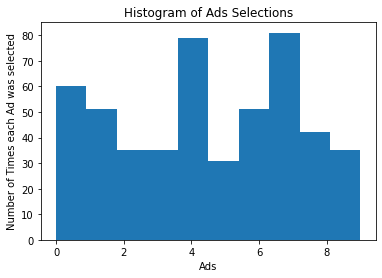

In [13]:
plt.hist(ads_selected)
plt.title('Histogram of Ads Selections')
plt.xlabel('Ads')
plt.ylabel('Number of Times each Ad was selected')
plt.show()